In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Solutions to Exercises

1) Logistic Growth and COVID-19

2) The Basic SIR Model

3) Cholera in Haiti

4) HIV-AIDS

Problem 1

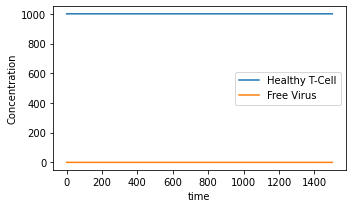

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t, params):
    T, T1,T2, V = y      # unpack current values of y
    s,r,Tmax,muT,mub,muV,k1,k2,N= params  # unpack parameters
    derivs = [s+r*T*(1-(T+T1+T2)/Tmax)-muT*T-k1*T*V,   # list of dy/dt=f functions
             k1*T*V-muT*T1-k2*T1,
             k2*T1-mub*T2,
             N*mub*T2-k1*T*V-muV*V]
    return derivs

# Parameters
s=10
r=.03
Tmax=1500
muT=.02
mub=.24
muV=2.4
k1 = 10**(-6)       
k2=3*10**(-3)
N=500

# Initial values
T0=1000
T10=0
T20=0
V0=10**(-3)

# Bundle parameters for ODE solver
params = [s,r,Tmax,muT,mub,muV,k1,k2,N]

# Bundle initial conditions for ODE solver
y0 = [T0,T10,T20,V0]

# Make time array for solution
tStop = 1501
tInc = 0.05
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure(1, figsize=(5,3))
plt.plot(t, psoln[:,0],label='Healthy T-Cell')
plt.plot(t, psoln[:,3],label='Free Virus')
plt.legend()
plt.xlabel('time')
plt.ylabel('Concentration')
plt.savefig("Ex1.png")
plt.tight_layout()
plt.show()

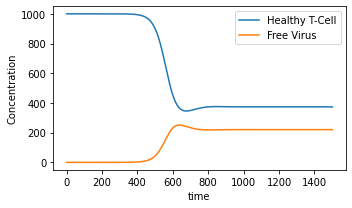

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t, params):
    T, T1,T2, V = y      # unpack current values of y
    s,r,Tmax,muT,mub,muV,k1,k2,N= params  # unpack parameters
    derivs = [s+r*T*(1-(T+T1+T2)/Tmax)-muT*T-k1*T*V,   # list of dy/dt=f functions
             k1*T*V-muT*T1-k2*T1,
             k2*T1-mub*T2,
             N*mub*T2-k1*T*V-muV*V]
    return derivs

# Parameters
s=10
r=.03
Tmax=1500
muT=.02
mub=.24
muV=2.4
k1 = 10**(-4)       
k2=3*10**(-3)
N=500

# Initial values
T0=1000
T10=0
T20=0
V0=10**(-3)

# Bundle parameters for ODE solver
params = [s,r,Tmax,muT,mub,muV,k1,k2,N]

# Bundle initial conditions for ODE solver
y0 = [T0,T10,T20,V0]

# Make time array for solution
tStop = 1501
tInc = 0.05
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure(1, figsize=(5,3))
plt.plot(t, psoln[:,0],label='Healthy T-Cell')
plt.plot(t, psoln[:,3],label='Free Virus')
plt.legend()
plt.xlabel('time')
plt.ylabel('Concentration')
plt.savefig("Ex1.png")
plt.tight_layout()
plt.show()

When $k1=10^{-6}$, we do not see the onset of AIDS.  On the other hand, when $k1=10^{-4}$, the onset of AIDS occurs at around day 500.

Problem 2

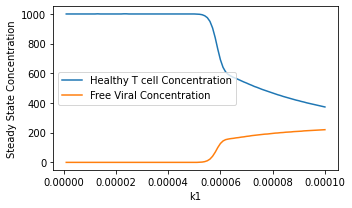

In [8]:
def f(y, t, params):
    T, T1,T2, V = y      # unpack current values of y
    s,r,Tmax,muT,mub,muV,k1,k2,N= params  # unpack parameters
    derivs = [s+r*T*(1-(T+T1+T2)/Tmax)-muT*T-k1*T*V,   # list of dy/dt=f functions
             k1*T*V-muT*T1-k2*T1,
             k2*T1-mub*T2,
             N*mub*T2-k1*T*V-muV*V]
    return derivs

# Parameters
s=10
r=.03
Tmax=1500
muT=.02
mub=.24
muV=2.4
k2=3*10**(-3)
N=500
# Initial values
T0=1000
T10=0
T20=0
V0=10**(-3)
# Bundle initial conditions for ODE solver
y0 = [T0,T10,T20,V0]

# Make time array for solution
tStop = 1501.
tInc = 0.05
t = np.arange(0., tStop, tInc)

# k1 values
k1val=np.arange(10**(-6),10**(-4),.000001)
Tval=np.arange(0,100,1)
Vval=np.arange(0,100,1)

for i in np.arange(0,100,1):
    # Bundle parameters for ODE solver
    params = [s,r,Tmax,muT,mub,muV,k1val[i],k2,N]
    # Call the ODE solver
    psoln = odeint(f, y0, t, args=(params,))
    Tval[i]=psoln[30000,0]
    Vval[i]=psoln[30000,3]
    
fig = plt.figure(1, figsize=(5,3))
plt.plot(k1val, Tval,label='Healthy T cell Concentration')
plt.plot(k1val, Vval,label='Free Viral Concentration')
plt.legend()
plt.xlabel('k1')
plt.ylabel('Steady State Concentration')
plt.savefig("k1sa.png")
plt.tight_layout()
plt.show()

Problem 3

In [9]:
#part a)
def treatment(i,j):
    def f(y, t, params):
        T, T1,T2, V = y      # unpack current values of y
        s,r,Tmax,muT,mub,muV,k1,k2,N= params  # unpack parameters
        derivs = [s+r*T*(1-(T+T1+T2)/Tmax)-muT*T-k1*T*V,   # list of dy/dt=f functions
             k1*T*V-muT*T1-k2*T1,
             k2*T1-mub*T2,
             N*mub*T2-k1*T*V-muV*V]
        return derivs

    # Parameters
    s=10
    r=.03
    Tmax=1500
    muT=.02
    mub=.24
    muV=2.4
    k2=3*10**(-3)
    N=100+i
    k1=j*10**(-5)
    # Initial values
    T0=1000
    T10=0
    T20=0
    V0=10**(-3)
    # Bundle initial conditions for ODE solver
    y0 = [T0,T10,T20,V0]

    # Make time array for solution
    tStop = 1501.
    tInc = 0.05
    t = np.arange(0., tStop, tInc)

    # Bundle parameters for ODE solver
    params = [s,r,Tmax,muT,mub,muV,k1val[i-1],k2,N]
    # Call the ODE solver
    psoln = odeint(f, y0, t, args=(params,))
    Tss=psoln[30000,0]
    return Tss

In [10]:
# part b)
Z=np.eye(101, 21)
for i in np.arange(1,101,1):
    for j in np.arange(1,21,1):
        Z[i,j]=treatment(i,j)
Z[10,5] # steady state T-cell concentration when N=100, k1= 5 * 10**(-5)

999.9999999998947

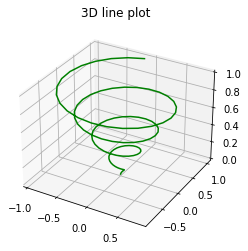

In [11]:
# importing mplot3d toolkits, numpy and matplotlib
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis
z = np.linspace(0, 1, 100)
x = z * np.sin(25 * z)
y = z * np.cos(25 * z)
 
# plotting
ax.plot3D(x, y, z, 'green')
ax.set_title('3D line plot')
plt.show()

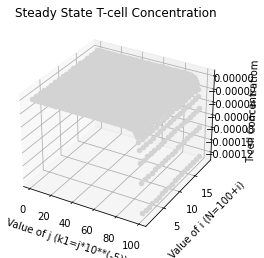

In [12]:
# part c)

# Creating dataset
x=np.arange(0,100,1)
y=np.arange(0,20,1)
z=Z

# Creating figure
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
for i in np.arange(1,100,1):
    for j in np.arange(1,20,1):
        ax.scatter(i, j, Z[i,j],color='lightgray')
ax.set_title('Steady State T-cell Concentration')
ax.set_xlabel('Value of j (k1=j*10**(-5))')
ax.set_ylabel('Value of i (N=100+i)')
ax.set_zlabel('T cell Concentratiom')
plt.show()
 


The graph shows the dramatic reduction of T-cell count when the values or  𝑛
  and/or  𝑘1
  become sufficiently large.

5) CWS Model of Alzheimer's Disease


The A$\beta$ concentration in the brain during treatment 2
decreases by 2.5\% while the concentrations in the CSF and plasma
both roughly double (in agreement with Figure 6 b-d in [Craft et.
al. 2002]).


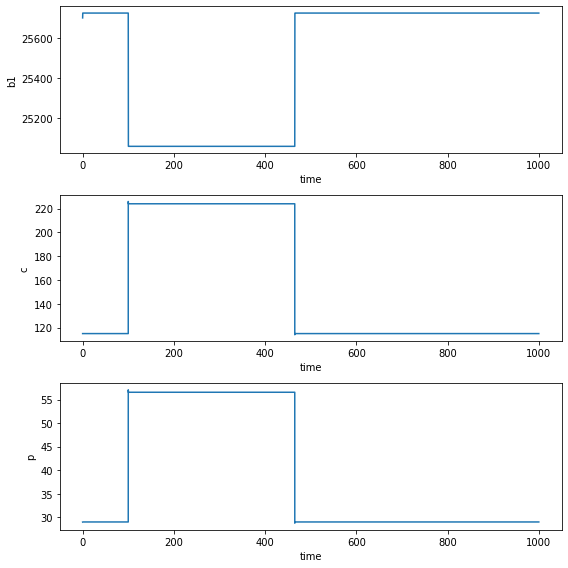

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t, params):
    b1, c,p = y      # unpack current values of y
    k1,k2,k3, r12,r13,r23,r21,r31,r32,L1,L2,L3 = params  # unpack parameters
    derivs = [k1+r31*p+r21*c-(r13*b1+r12*b1*(1+np.heaviside(t-100,0)-np.heaviside(t-465,0)))-L1*b1,      # list of dy/dt=f functions
             k2+r12*b1*(1+np.heaviside(t-100,0)-np.heaviside(t-465,0))+r32*p-(r21*c+r23*c)-L2*c,
             k3+r13*b1+r23*c-(r31*p+r32*p)-L3*p,]
    return derivs

# Parameters
k1 = 7.34*86400         
L1 = 24 
k2=0
L2=0
k3=0
L3=6.7*10**(-3)*86400   
r12=7.6*10**(-6)*86400   
r23=1.7*10**(-3)*86400   
r31=3.7*10**(-5)*86400   
r32=0
r21=0
r13=0

# Initial values
b10 = 25.7*(10**3)     
c0 = 115
p0 = 29

# Bundle parameters for ODE solver
params = [k1,k2,k3, r12,r13,r23,r21,r31,r32,L1,L2,L3 ]

# Bundle initial conditions for ODE solver
y0 = [b10,c0,p0]

# Make time array for solution
tStop = 1000.
tInc = 0.05
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot b1 as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('time')
ax1.set_ylabel('b1')

# Plot c as a function of time
ax2 = fig.add_subplot(312)
ax2.plot(t, psoln[:,1])
ax2.set_xlabel('time')
ax2.set_ylabel('c')

# Plot p as a function of time
ax3 = fig.add_subplot(313)
ax3.plot(t, psoln[:,2])
ax3.set_xlabel('time')
ax3.set_ylabel('p')
plt.savefig("treatment2.png")
plt.tight_layout()
plt.show()

6) Gravity-Fed Water Delivery

[2.1] $F_{gn}=F_{g} \cos(\theta) = \gamma \delta V \cos(\theta) = \gamma \delta V \sqrt{1-(\frac{dz}{ds})^2}$.


[2.2] $\frac{dp}{ds}\approx \frac{p(s_0-\frac{\delta s}{2})-p(s_0)}{-\frac{\delta s}{2}} \Rightarrow p(s_0-\frac{\delta s}{2}) \approx p(s_0) -  \frac{dp}{ds} \frac{\delta s}{2}$.

[2.3] Since $z$ has dimension $L$, we must show the other two terms do as well.  Pressure being force per unit area, and force being mass time acceleration,  $p$ has dimension $\frac{M \frac{L}{T^2} }{L^2}=\frac{M}{LT^2}$. Since $\gamma=\rho g$ has dimension $\frac {M}{L^3} \frac{L}{T^2} = \frac{M}{L^2T^2}$,  the dimension of $\frac{p}{\gamma}$ is $\frac{M}{LT^2} \frac{L^2T^2}{M}=L$. The dimension for $\frac{u^2}{g}$ is  $\frac{(\frac{L}{T})^2}{\frac{L}{T^2}}=L$.

[3.1.1]

[a] Bernoulli's equation states $\frac{p}{\gamma}$ + $\frac{u^2}{2g}$ + z = c. Since $u=0$ $\frac{m}{sec}$ as a result of the tap being closed, $z_B=0$ m as shown in {\bf Figure \ref{fig9}}, and so our equation simplifies to $\frac{p}{\gamma}$ = c. Observing that c = 9 m + 2 m = 11 ft = $\frac{p \frac{kN}{m^2} }{9.789{\frac{kN}{m^3}}}$,
we obtain $p = 105.5$ ${\frac{kN}{m^2}}$.

[b]  From part a we know $\frac{p}{\gamma}$ = c. Observing that c = 30 ft + 6 ft = 36 ft = $\frac{p \frac{lb}{ft^2} }{62.3 {\frac{lb}{ft^3}}}$,
we obtain $p = 2242.8$ ${\frac{lb}{ft^2}} = 2242.8 {\frac{lb}{ft^2}} \cdot {\frac{(1 ft)^2}{(12 in)^2}} = 15.6 {\frac{lb}{in^2}}$.


[3.1.2]  Referring to Figure (S1), let $h$ be the desired vertical distance from the source reservoir to the faucet. Then $h$ satisfies

$$
\frac{1862\frac{kN}{m^2}}{9.789\frac{kN}{m^3}}=h+3 m \Rightarrow h\approx 187 m.
$$

<img src="figS1.png" width="400px"> 



[3.2.1] 
[a] At a horizontal distance of 600 m, pressure is greatest since the vertical drop from the source is a maximum  (114 m).

[b] The pipe can operate at a pressure head of $\frac{p}{\gamma}=\frac{917 \frac{kN}{m^2}}{9.789\frac{kN}{m^3}}$ = 93.7 m, so 1 intermediate tank is required.



[3.2.2]  Pressure at A is equal to $p_A=[(h_1+h_2)-(h_3+h_4)]\gamma$. The pressure at B is equal to $p_B=(h_3+h_4)\gamma$. The break-pressure tank effectively reduces the pressure at the faucet by the amount $p_A$.


[3.3.1]  .1215 liters/sec.

[3.3.2]
[a]  A velocity head of 3 m (10 ft) corresponds to a speed $u_1=[3(2)(9.8)]^{1/2}\approx 7.7$ m/s.  By the continuity equation,  $\pi (0.025)^2 u_1 = \pi (0.02)^2 u_2$ so $u_2 \approx 11.9$ m/s with a corresponding velocity head of roughly 7.3 m (31.6 feet).

%$u_1=[10(2)(32)]^{1/2}\approx 25.3$ ft/sec.

[b]

$$
\pi r_1^2 u_0 = \pi r_2^2 u_{B} \Rightarrow u_0 = (\frac{r_2}{r_1})^2 \sqrt{2g(h_1 + h_2)}. 
$$


[4.1]

$$
\frac{p_1}{\gamma}+\frac{u_1^2}{2g}+z_1=\frac{p_2}{\gamma}+\frac{u_2^2}{2g}+z_2+h_f \Rightarrow \, 0+0+50=\frac{p_2}{\gamma}+\frac{2.5^2}{2g}+30+25  
$$

$$
p_2=(50-0.32-25-30)*9.789 \frac{kN}{m^2}=\,-52.08 \frac{kN}{m^2}
$$
A negative pressure means that pressure inside the pipe is less than outside.  This can cause dirt or air to be sucked into the pipe, resulting in a stoppage of flow.


[4.2] The Reynolds number $\frac{\rho \bar{u} D}{\mu}$ is dimensionless since all units cancel in the expression $\frac{\frac{M}{L^3}\frac{L}{T}L}{\frac{M}{LT}}$.

[4.3.1] $F_{gs} = - F_g \sin \theta = - m g \sin \theta =  - \rho (\pi r^2 L) g \sin \theta = - \gamma \pi r^2 L \sin \theta.$



[4.3.2] $Q = \int_0^{2\pi} \int_0^R u_0(1-(r/R)^2 ) r dr d\theta = \frac{\pi R^2 u_0}{2}$.


[4.3.3] Since the pipe is wider at B than at A, $u_B$ is less than $u_A$.  Head loss from A to B is represented by $h_{AB}$.

[4.3.4] 
$$
Re=\frac{\rho \bar{u} D}{\mu}=\frac{998.2\cdot 2\cdot D}{0.001}<2100\Rightarrow D<0.001 m = 1 mm. 
$$ 

The flow rate would be 

$$
Q=\bar{u}A<\bar{u}\pi (\frac{D}{2})^2=1.6 x 10^{-6} \frac{m^3}{s}.
$$  

So for a very reasonable $\bar{u}$ the pipe would have to be unreasonably small.  This shows that, while laminar flow is a useful assumption to analyze friction, it is unrealistic for gravity-fed water delivery systems.

[4.4.1] The iron pipe has the greater friction factor.

[4.4.2]

<img src="figS2.png" width="400px"> 

[4.5.1] The average velocities associated with the minimum and maximum flow rates are respectively $\stackrel{-}{u} = .35 \frac{(10^{-3})}{\pi (.0125)^2} =.71 (m/s)$ and $\stackrel{-}{u} = 1.4 \frac{(10^{-3})}{\pi (.0125)^2} = 2.85$ (m/s). The respective Reynolds numbers are $Re = \frac{1.23(.71)(.025)}{1.79(10^{-5})} \approx 1200$,
and $Re = \frac{1.23(2.85)(.025)}{1.79(10^{-5})} \approx 4900.$ This indicates that the flow at the minimum flow rate is laminar, but will be turbulent at the maximum flow rate. Note in {\bf Table 5} the big difference in head loss between these laminar and turbulent flows: 3.45 m per 100 m at the minimum flow rate versus  49.5 m per 100 m at the maximum flow rate.

[4.5.2] Using the equation for $f$ given in {\bf (\ref{Colebrook})} or a Moody chart , we can determine the Reynolds number $Re$.  We may then compute

$$
\stackrel{-}{u} =\frac{\mu Re}{\rho D},
$$

$$
Q = \pi (\frac{D}{2})^2 \stackrel{-}{u}
$$

and

$$
h_f = f \frac{L}{D} \frac{\stackrel{-}{u}^2}{2g}.
$$


Knowing the head loss, we can easily plot the HGL on the graph shown in Figure (21). The HGL will help us decide whether the pipe may be used for that segment of the system as explained in Section 4.4.

[5.1] There are different possible designs, but a system using a 80 mm diameter is shown here.  In 10 years Tesuque Pueblo will have about 1148 people and a required volumetric flow rate of $Q=4.27 l/s=0.00427 m^3/s$.  A 80 mm diameter pipe has a cross-sectional area of 0.005 $m^2$, so our average velocity is 0.85 m/s (low, but within limits).  The maximum static pressure will be $2255-1950=335$ m at the outlet faucet, which is above the maximum operating pressure head from {\bf Table 5} (146 m).  Break pressure tanks at elevations of 2130 m and 2030 m reduce the maximum static pressures to 125 m, 100 m, and 110 m in the first, second, and third sections, respectively (Note that since a 2030 m elevation isn't included in the survey, we don't know if there is a suitable building site at this location.  In that case a third break pressure tank would be needed).  By rounding our flow rate down we get from {\bf Table 5} a head loss of about 0.96 m per 100 m.  We will approximate horizontal distance as pipe length, so our HGL is modeled by the equation $2255-\frac{0.85^2}{2g}-0.96x$.  If we compare this line to the given elevations we find the elevations remain below the HGL line.  This means the dynamic pressure will never be negative and the system is feasible.

